### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Basic info and check for missing values
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()
summary = {
    "Total Rows": data.shape[0],
    "Total Columns": data.shape[1],
    "Missing Values Per Column": missing_values,
    "Total Duplicates": duplicates,
    "Data Types": data.dtypes
}
print (summary)


{'Total Rows': 12684, 'Total Columns': 26, 'Missing Values Per Column': destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64, 'Total Duplicates': 74, 'Data Types': destination             object
passanger               object
weather                 object
tem

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop the 'car' column due to excessive missing values
clean_data = data.drop(columns=['car'])

# Remove duplicate rows
clean_data = clean_data.drop_duplicates()

# Fill missing values in categorical columns with 'Unknown'
categorical_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
clean_data[categorical_cols] = clean_data[categorical_cols].fillna('never')

# Convert 'age' column to numeric 
clean_data['age'] = pd.to_numeric(clean_data['age'], errors='coerce')

# Rename 'passanger' to 'passenger'
clean_data.rename(columns={'passanger': 'passenger'}, inplace=True)


# Summary after cleaning
cleaned_summary = {
    "Total Rows After Cleaning": clean_data.shape[0],
    "Total Columns After Cleaning": clean_data.shape[1],
    "Missing Values After Cleaning": clean_data.isnull().sum(), 
    "Duplicate Rows After Cleaning": clean_data.duplicated().sum(),
    "Data Types After Cleaning": clean_data.dtypes
}

cleaned_summary


{'Total Rows After Cleaning': 12610,
 'Total Columns After Cleaning': 25,
 'Missing Values After Cleaning': destination                0
 passenger                  0
 weather                    0
 temperature                0
 time                       0
 coupon                     0
 expiration                 0
 gender                     0
 age                     2325
 maritalStatus              0
 has_children               0
 education                  0
 occupation                 0
 income                     0
 Bar                        0
 CoffeeHouse                0
 CarryAway                  0
 RestaurantLessThan20       0
 Restaurant20To50           0
 toCoupon_GEQ5min           0
 toCoupon_GEQ15min          0
 toCoupon_GEQ25min          0
 direction_same             0
 direction_opp              0
 Y                          0
 dtype: int64,
 'Duplicate Rows After Cleaning': 0,
 'Data Types After Cleaning': destination              object
 passenger                obj

4. What proportion of the total observations chose to accept the coupon?



Proportion of accepted coupons: 56.76%


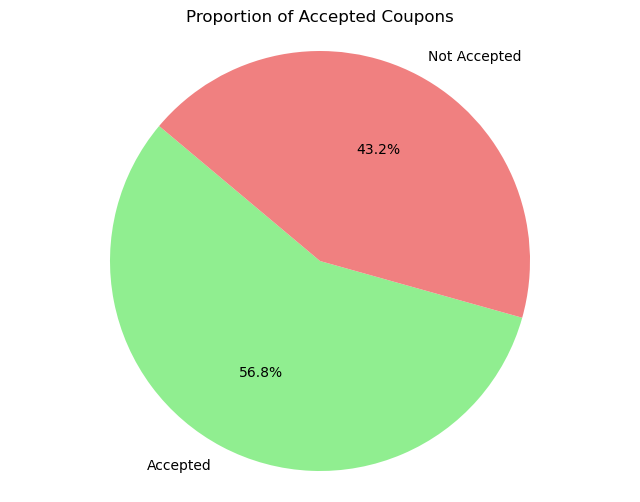

In [6]:
#  Proportion of accepted coupons
coupon_acceptance_rate = clean_data['Y'].mean()
print(f"Proportion of accepted coupons: {coupon_acceptance_rate:.2%}")
# Calculate the counts of accepted and not accepted coupons
accepted_counts = clean_data['Y'].value_counts()

# Define labels and sizes for the pie chart
labels = ['Accepted', 'Not Accepted']
sizes = [accepted_counts[1], accepted_counts[0]]
colors = ['lightgreen', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Accepted Coupons')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

5. Use a bar plot to visualize the `coupon` column.

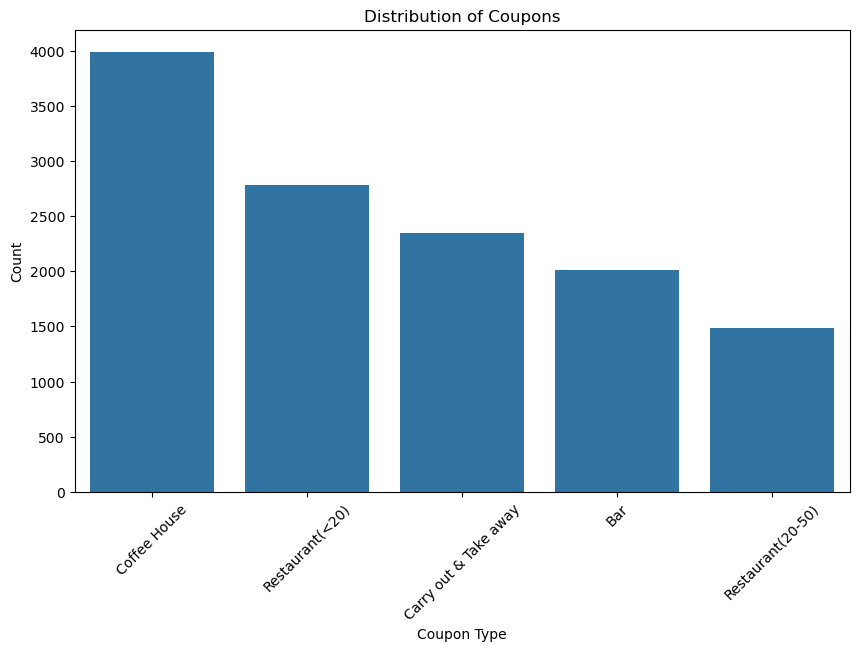

In [7]:
# Bar plot to visualize the coupon column
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data, x='coupon', order=clean_data['coupon'].value_counts().index)
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

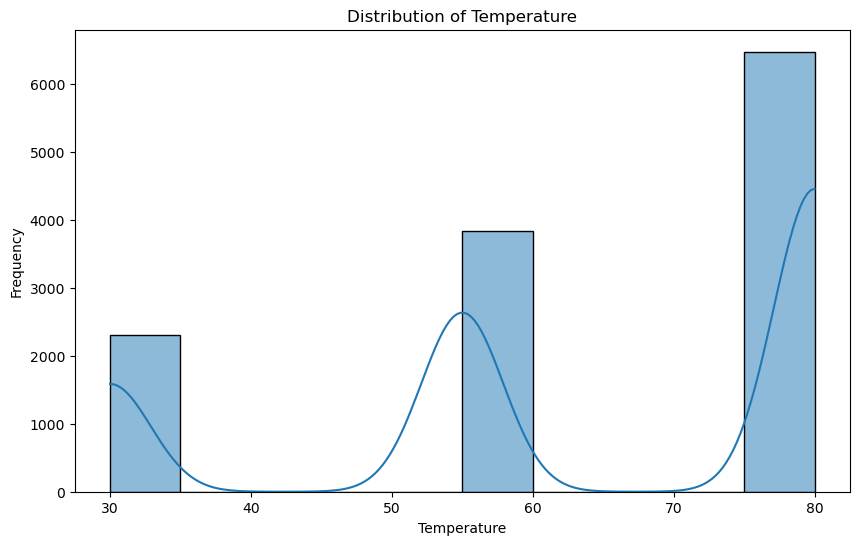

In [8]:
# Histogram to visualize the temperature column
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['temperature'], bins=10, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
#  DataFrame that contains just the bar coupons
bar_coupons = clean_data[clean_data['coupon'] == 'Bar'].copy()
bar_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Proportion of accepted bar coupons: 41.00%


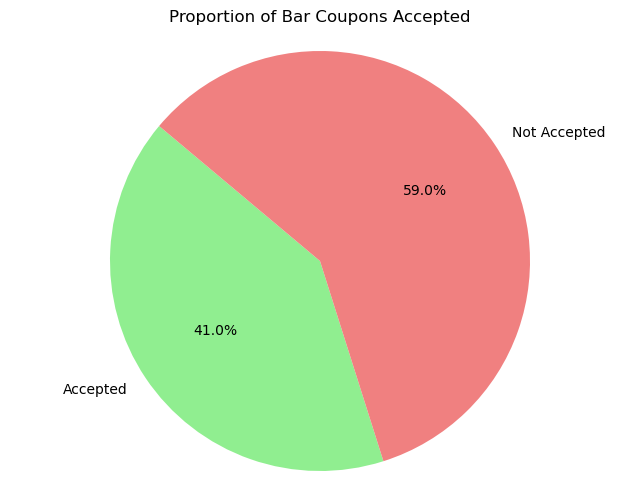

In [12]:
# Proportion of accepted bar coupons
bar_coupon_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of accepted bar coupons: {bar_coupon_acceptance_rate:.2%}")
# Calculate the counts of accepted and not accepted bar coupons
accepted_counts = bar_coupons['Y'].value_counts()

# Define labels and sizes for the pie chart
labels = ['Accepted', 'Not Accepted']
sizes = [accepted_counts[1], accepted_counts[0]]
colors = ['lightgreen', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Bar Coupons Accepted')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


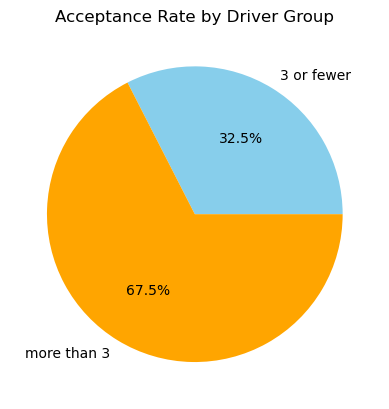

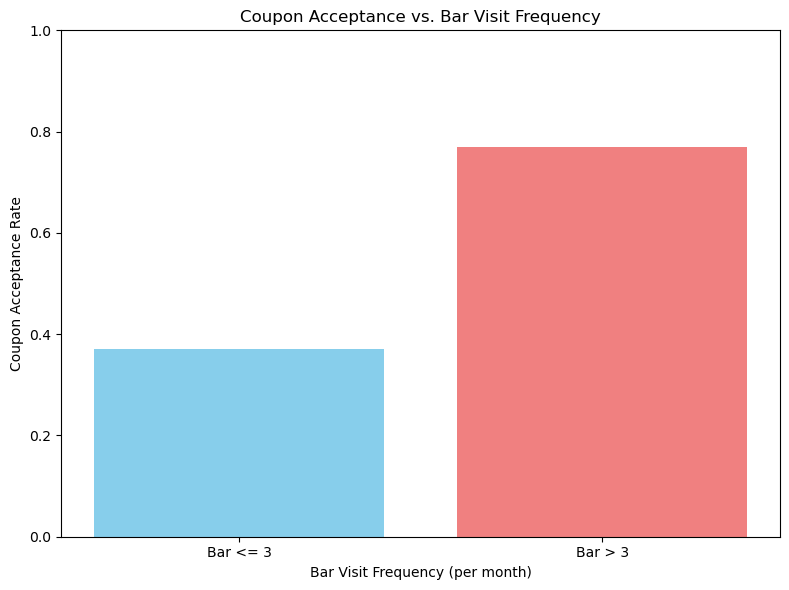

In [13]:
# Adding a new column to categorize bar visits
# Define the condition for drivers who went to a bar 3 or fewer times a month to those who went more.
bar_condition = (bar_coupons['Bar'].isin(['never', 'less1', '1~3']))
bar_coupons['bar_visits'] = bar_condition.apply(lambda x: '3 or fewer' if x   else 'more than 3')


# Define the condition for drivers who  went to a bar 3 or fewer times a month to those who went more.
acceptance_rates = bar_coupons.groupby('bar_visits')['Y'].mean()

acceptance_rates.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.ylabel('')  # Hide y-label
plt.title('Acceptance Rate by Driver Group')

#Create the bar graph
categories = ['Bar <= 3', 'Bar > 3']
plt.figure(figsize=(8,6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Bar Visit Frequency (per month)")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance vs. Bar Visit Frequency")
plt.ylim(0,1) 
plt.tight_layout() 
plt.show()




4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


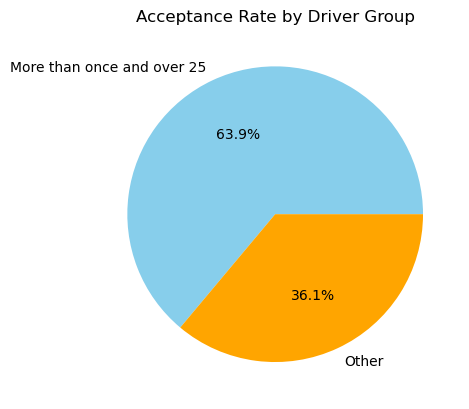

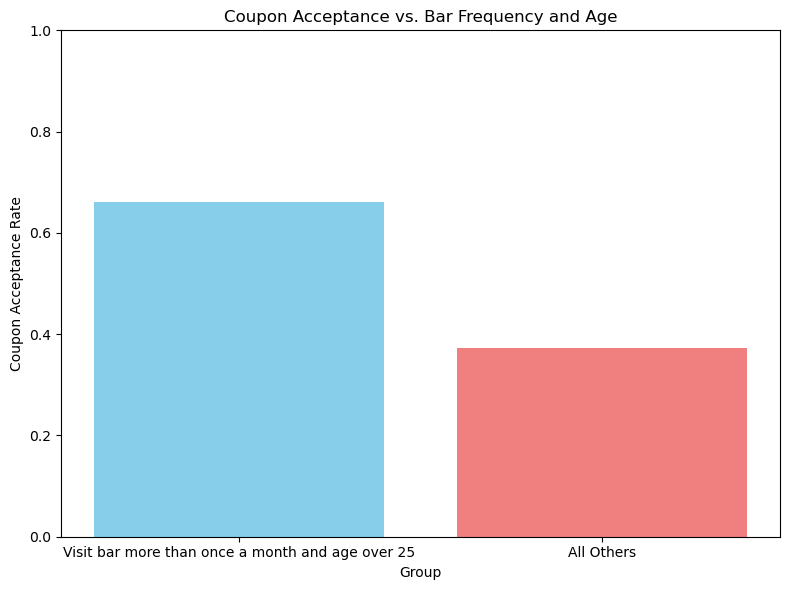

In [14]:
# Filter the data for drivers who go to a bar more than once a month and are over the age of 25
bar_condition = (bar_coupons['Bar'].isin(['gt8', '4-8', '1~3']))& (bar_coupons['age'] > 25)
bar_coupons['bar_visits'] = bar_condition.apply(lambda x: 'More than once and over 25' if x   else 'Other')

# Calculate the acceptance rate for this group
acceptance_rates = bar_coupons.groupby('bar_visits')['Y'].mean()

# Create the pie graph
acceptance_rates.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.ylabel('')  # Hide y-label
plt.title('Acceptance Rate by Driver Group')

# Create the bar graph
categories = ['Visit bar more than once a month and age over 25', 'All Others']


plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Group")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance vs. Bar Frequency and Age")
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.tight_layout()  # Adjusts plot parameters for a tight layout
plt.show()



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


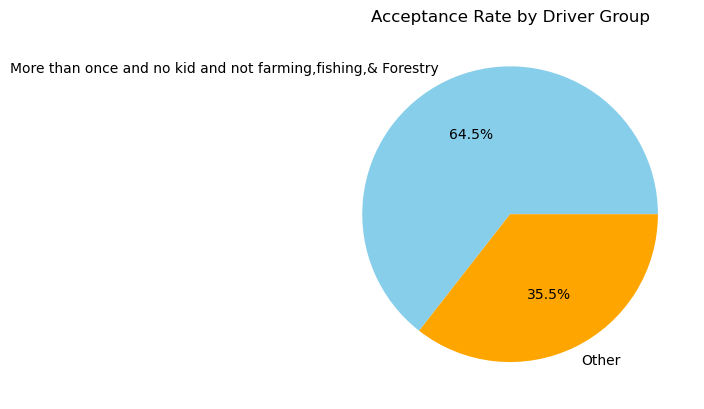

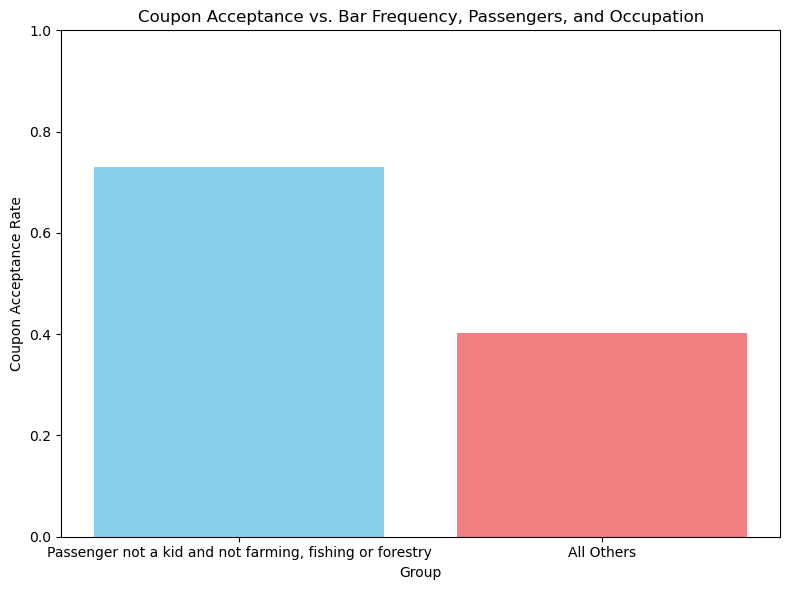

In [15]:
# Filter the data for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry

bar_condition = (bar_coupons['Bar'].isin(['gt8', '4-8'])) & \
                (bar_coupons['passenger'] != 'Kid(s)') & \
                (bar_coupons['occupation'] != 'Farming, Fishing, & Forestry')

bar_coupons['bar_visits'] = bar_condition.apply(lambda x: 'More than once and no kid and not farming,fishing,& Forestry' if x   else 'Other')

# Calculate the acceptance rate for this group
acceptance_rates = bar_coupons.groupby('bar_visits')['Y'].mean()

# Create the pie graph
acceptance_rates.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.ylabel('')  # Hide y-label
plt.title('Acceptance Rate by Driver Group')


# Create the bar graph
categories_filtered = ['Passenger not a kid and not farming, fishing or forestry', 'All Others']


plt.figure(figsize=(8, 6))
plt.bar(categories_filtered, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Group")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance vs. Bar Frequency, Passengers, and Occupation")
plt.ylim(0, 1)  
plt.tight_layout() 
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



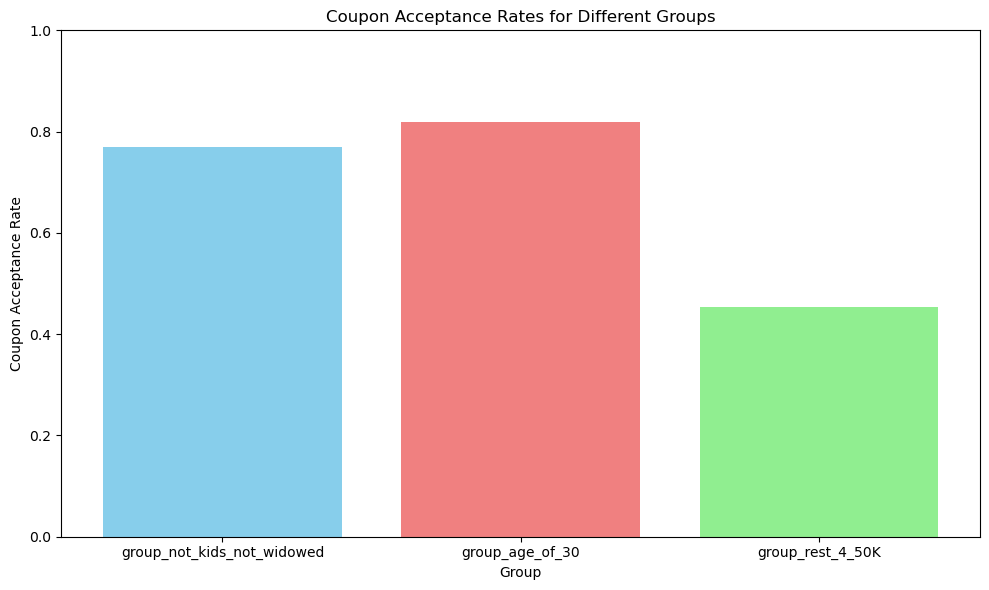

In [16]:
# Filter the data for the specified groups



group_not_kids_not_widowed =  bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8'])) & \
                             (bar_coupons['passenger'] != 'Kid') & \
                             (bar_coupons['maritalStatus'] != 'Widowed')]

group_age_of_30 = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8'])) & \
                  (bar_coupons['age'] < 30)]

 #Extract the lower bound of the income range and convert it to float
bar_coupons['income_lower_bound'] = bar_coupons['income'].str.extract(r'(\d+)').astype(float)
group_rest_4_50K =  bar_coupons[(bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & \
                   (bar_coupons['income_lower_bound'] < 50000)]

# Calculate the acceptance rates for each group
acceptance_rate_group_not_kids_not_widowed = group_not_kids_not_widowed['Y'].mean()
acceptance_rate_group_age_of_30 = group_age_of_30['Y'].mean()
acceptance_rate_group_rest_4_50K = group_rest_4_50K['Y'].mean()

# Create the bar graph
categories = ['group_not_kids_not_widowed', 'group_age_of_30', 'group_rest_4_50K']
acceptance_rates = [acceptance_rate_group_not_kids_not_widowed, acceptance_rate_group_age_of_30, acceptance_rate_group_rest_4_50K]

plt.figure(figsize=(10, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Group")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rates for Different Groups")
plt.ylim(0, 1)  
plt.tight_layout()  
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the observations, we can hypothesize the following about drivers who accepted the bar coupons:

1. **Frequency of Bar Visits**: Drivers who visit bars more frequently (more than 3 times a month) are more likely to accept bar coupons compared to those who visit bars less frequently.

2. **Age**: Younger drivers, particularly those under the age of 30, show a higher acceptance rate for bar coupons.

3. **Companions**: Drivers who are not accompanied by kids and have other passengers (friends, partners) are more likely to accept bar coupons.

4. **Occupation**: Drivers with occupations other than farming, fishing, or forestry are more inclined to accept bar coupons.

5. **Income**: Drivers with an income less than $50,000 and who frequently visit inexpensive restaurants (more than 4 times a month) are more likely to accept bar coupons.

These hypotheses suggest that social and lifestyle factors, such as age, frequency of bar visits, type of companions, occupation, and income, play significant roles in the likelihood of accepting bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
#  DataFrame that contains just the coffee house coupons
coffee_house_coupons = clean_data[clean_data['coupon'] == 'Coffee House'].copy()
coffee_house_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


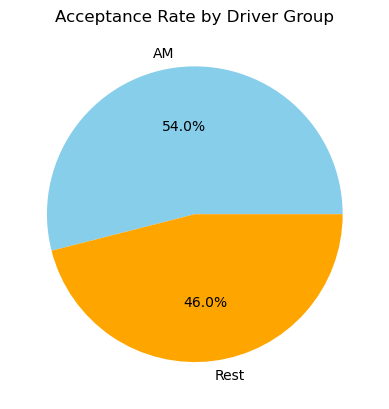

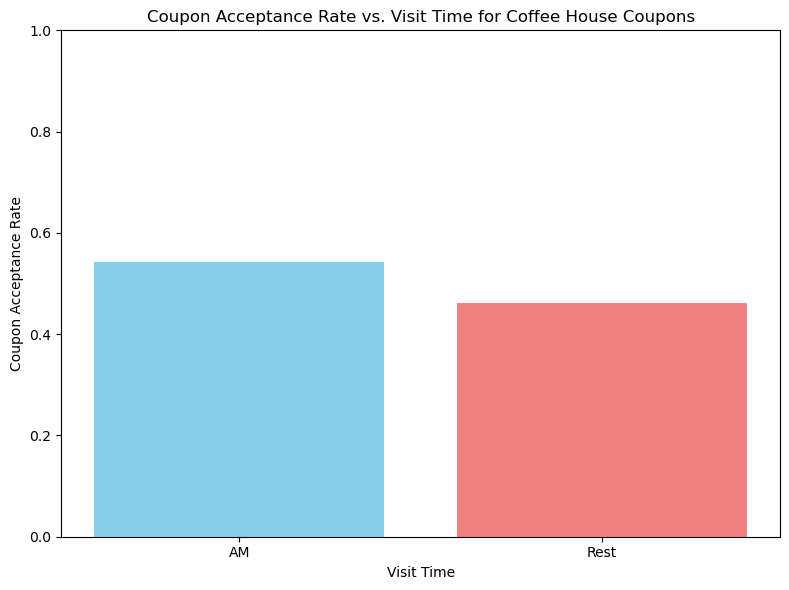

In [19]:



# Add a new column to categorize visits based on time
coffee_house_coupons['visit_time'] = coffee_house_coupons['time'].apply(lambda x: 'AM' if 'AM' in x else 'Rest')

# Calculate acceptance rates for each category
acceptance_rates = coffee_house_coupons.groupby('visit_time')['Y'].mean()

# Create the pie graph
acceptance_rates.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.ylabel('')  # Hide y-label
plt.title('Acceptance Rate by Driver Group')


# Create the bar graph
categories = ['AM', 'Rest']

plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Visit Time")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate vs. Visit Time for Coffee House Coupons")
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.tight_layout()  # Adjusts plot parameters for a tight layout
plt.show()

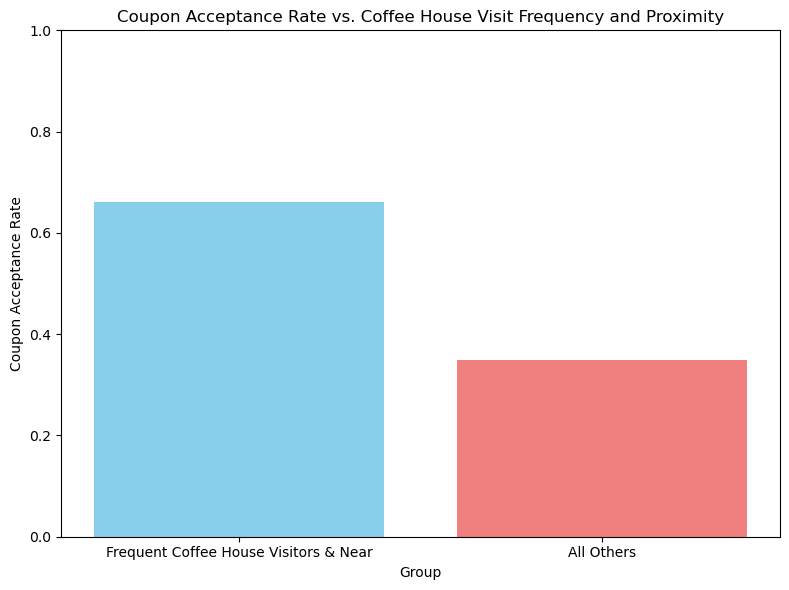

In [77]:
# Filter the data for drivers who go to a coffee house more than once a month and have toCoupon_GEQ15min less than 15
coffee_house_frequent_and_near = coffee_house_coupons[(coffee_house_coupons['CoffeeHouse'] != 'never') & 
                                                      (coffee_house_coupons['CoffeeHouse'] != 'less1') & 
                                                      (coffee_house_coupons['toCoupon_GEQ15min'] < 15)]

# Calculate the acceptance rate for this group
acceptance_rate_frequent_and_near = coffee_house_frequent_and_near['Y'].mean()

# Calculate the acceptance rate for all others
all_others_coffee_house = coffee_house_coupons[~((coffee_house_coupons['CoffeeHouse'] != 'never') & 
                                                 (coffee_house_coupons['CoffeeHouse'] != 'less1') & 
                                                 (coffee_house_coupons['toCoupon_GEQ15min'] < 15))]
acceptance_rate_all_others_coffee_house = all_others_coffee_house['Y'].mean()

# Create the bar graph
categories = ['Frequent Coffee House Visitors & Near', 'All Others']
acceptance_rates = [acceptance_rate_frequent_and_near, acceptance_rate_all_others_coffee_house]

plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Group")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate vs. Coffee House Visit Frequency and Proximity")
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.tight_layout()  # Adjusts plot parameters for a tight layout
plt.show()

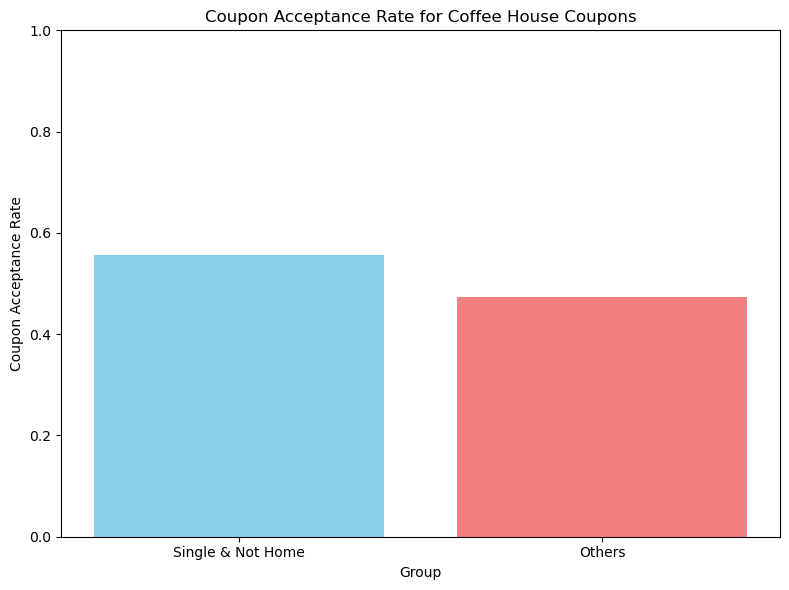

In [20]:
# Filter the data for drivers who go to a coffee house when marital status is single and destination is not home
single_not_home = coffee_house_coupons[(coffee_house_coupons['maritalStatus'] == 'Single') & (coffee_house_coupons['destination'] != 'Home')]

# Filter the data for all other drivers
others = coffee_house_coupons[~((coffee_house_coupons['maritalStatus'] == 'Single') & (coffee_house_coupons['destination'] != 'Home'))]

# Calculate the acceptance rate for each group
acceptance_rate_single_not_home = single_not_home['Y'].mean()
acceptance_rate_others = others['Y'].mean()

# Create the bar graph
categories = ['Single & Not Home', 'Others']
acceptance_rates = [acceptance_rate_single_not_home, acceptance_rate_others]

plt.figure(figsize=(8, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral'])
plt.xlabel("Group")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rate for Coffee House Coupons")
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.tight_layout()  # Adjusts plot parameters for a tight layout
plt.show()

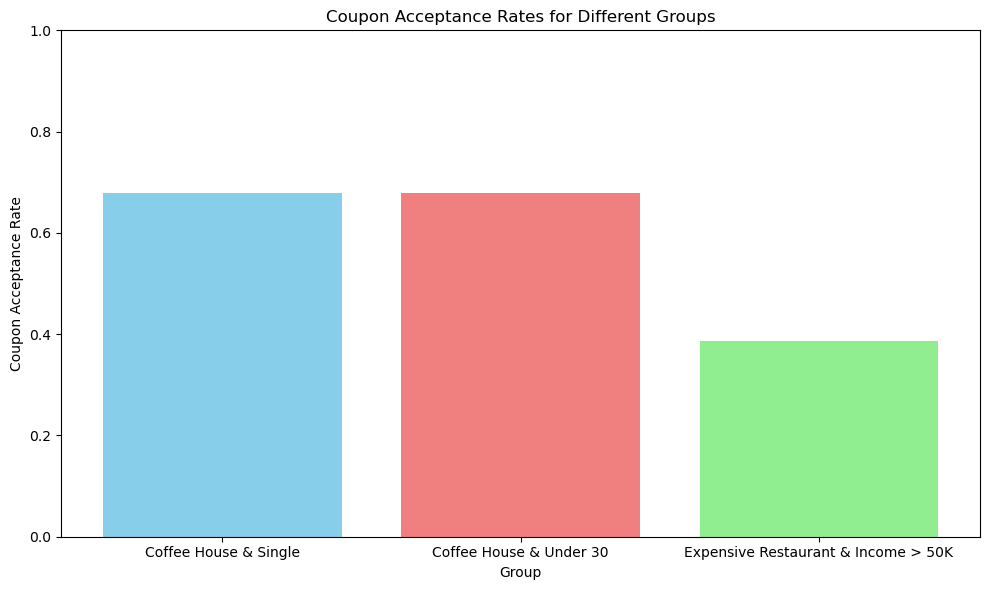

In [22]:
# Filter the data for the specified groups
group_coffee_single = coffee_house_coupons[(coffee_house_coupons['CoffeeHouse'] != 'never') & \
                                 (coffee_house_coupons['CoffeeHouse'] != 'less1') & \
                                 (coffee_house_coupons['maritalStatus'] == 'Single')]

group_coffee_under_30 = coffee_house_coupons[(coffee_house_coupons['CoffeeHouse'] != 'never') & \
                                   (coffee_house_coupons['CoffeeHouse'] != 'less1') & \
                                   (coffee_house_coupons['age'] < 30)]

coffee_house_coupons['income_lower_bound'] = coffee_house_coupons['income'].str.extract(r'(\d+)').astype(float)

group_exp_rest_4_50K = coffee_house_coupons[(coffee_house_coupons['Restaurant20To50'] == '4~8') & \
                                  (coffee_house_coupons['income_lower_bound'] > 50000)]


# Calculate the acceptance rates for each group
acceptance_rate_group_coffee_single = group_coffee_single['Y'].mean()
acceptance_rate_group_coffee_under_30 = group_coffee_under_30['Y'].mean()
acceptance_rate_group_exp_rest_4_50K = group_exp_rest_4_50K['Y'].mean()

# Create the bar graph
categories = ['Coffee House & Single', 'Coffee House & Under 30', 'Expensive Restaurant & Income > 50K']
acceptance_rates = [acceptance_rate_group_coffee_single, acceptance_rate_group_coffee_under_30, acceptance_rate_group_exp_rest_4_50K]

plt.figure(figsize=(10, 6))
plt.bar(categories, acceptance_rates, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Group")
plt.ylabel("Coupon Acceptance Rate")
plt.title("Coupon Acceptance Rates for Different Groups")
plt.ylim(0, 1)  # Acceptance rate is between 0 and 1
plt.tight_layout()  # Adjusts plot parameters for a tight layout
plt.show()

Based on the observations, we can hypothesize the following about drivers who accepted the coffee house coupons:

1. **Visit Time**: Drivers who visit coffee houses in the morning (AM) are more likely to accept coffee house coupons compared to those who visit at other times.

2. **Frequency and Proximity**: Drivers who frequently visit coffee houses (more than once a month) and are within 15 minutes of the coffee house are more likely to accept the coupons.

3. **Marital Status and Destination**: Single drivers who are not heading home are more likely to accept coffee house coupons compared to others.

4. **Age**: Younger drivers, particularly those under the age of 30, show a higher acceptance rate for coffee house coupons.

5. **Income and Restaurant Visits**: Drivers with an income greater than $50,000 who frequently visit expensive restaurants (more than 4 times a month) are more likely to accept coffee house coupons.

These hypotheses suggest that factors such as visit time, frequency of visits, proximity, marital status, age, and income play significant roles in the likelihood of accepting coffee house coupons.